#This code assesses efficiency of Support Vector Machine, Multi-layer perceptron, and logistic regression in classifying pole moves based on landmarks.

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
dataFrame = pd.read_csv('/content/gdrive/MyDrive/pointYourPoseResearchColabs/pole_poses_no_outliers_csvs_out.csv')
dataFrame.head
#image name/ class/ features

<bound method NDFrame.head of         scissor0.jpg  scissorSit  2006.8503   1624.0208   -1593.3456  \
0       scissor1.jpg  scissorSit  881.01940   465.64685 -1102.504800   
1      scissor10.jpg  scissorSit  871.43475   346.31360  -371.125520   
2     scissor100.jpg  scissorSit  723.19904   717.09906   344.332240   
3     scissor103.jpg  scissorSit  549.72577   701.38980  -650.752800   
4     scissor105.jpg  scissorSit  515.79614   731.90936  -343.087800   
..               ...         ...        ...         ...          ...   
303  butterfly95.jpg   butterfly  631.13680  1186.53310  -155.513810   
304  butterfly96.jpg   butterfly  590.69550  1175.36610    35.266754   
305  butterfly97.jpg   butterfly  647.99646  1154.53630  -223.326800   
306  butterfly98.jpg   butterfly  682.30255  1119.04960  -431.599900   
307  butterfly99.jpg   butterfly  660.48816  1113.01890  -230.266570   

     2072.7856   1626.0464   -1594.366  2084.7407    1639.284  ...  \
0    913.37900   472.28815 -1108.68

In [ ]:
import numpy as np
from sklearn import preprocessing
#get labels
labels = dataFrame.iloc[:,1]

#code labels
le = preprocessing.LabelEncoder()
le.fit(labels)

numLabels = le.transform(labels)
print(np.unique(numLabels))
print(le.classes_)
features = dataFrame.iloc[:,2:]

[0 1 2]
['butterfly' 'scissorSit' 'superman']


In [ ]:
#split data 30% test 70% train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, numLabels, test_size=0.3)

# Support Vector Machine

In [ ]:
#support vector machine
from sklearn import svm
supVM = svm.SVC()
supVM.fit(X_train,y_train)

SVC()

[[33  3  1]
 [ 0 23  2]
 [ 1  5 25]]
accuracy: 0.8709677419354839


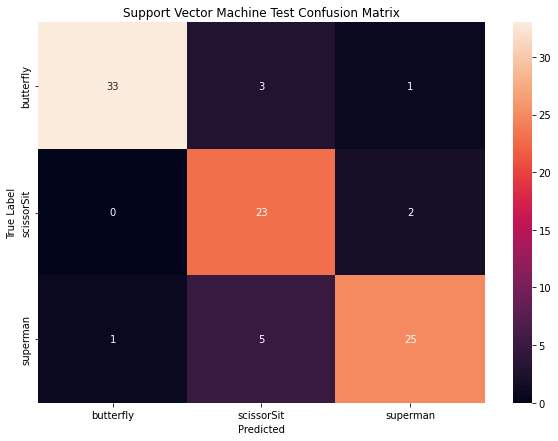

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
#get predictions
y_pred = supVM.predict(X_test)
title = "Support Vector Machine Test Confusion Matrix"


#confusion matrix
classLabels = le.classes_
the_matrix = confusion_matrix(y_pred, y_test, labels=np.unique(numLabels))
print(the_matrix)

df_cfm = pd.DataFrame(the_matrix, index = classLabels, columns = classLabels)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True, fmt='g')
cfm_plot.set_title(title)
cfm_plot.set_xlabel('Predicted')
cfm_plot.set_ylabel('True Label')

from sklearn.metrics import accuracy_score
print("accuracy:", accuracy_score(y_test, y_pred)) #why the same

# Artificial Neural Network

In [ ]:
#artificial neural network
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(max_iter = 500, activation = "logistic", solver = "sgd").fit(X_train,y_train)

[[34 12  4]
 [ 0 15  3]
 [ 0  4 21]]
accuracy: 0.7526881720430108


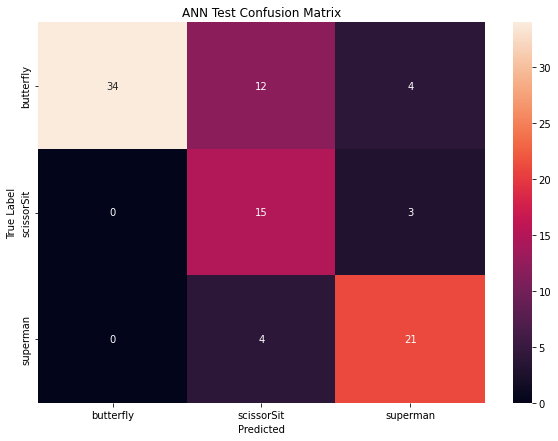

In [ ]:
#get predictions
y_pred = ann.predict(X_test)
title = "ANN Test Confusion Matrix"


#confusion matrix
classLabels = le.classes_
the_matrix = confusion_matrix(y_pred, y_test, labels=np.unique(numLabels))
print(the_matrix)

df_cfm = pd.DataFrame(the_matrix, index = classLabels, columns = classLabels)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True, fmt='g')
cfm_plot.set_title(title)
cfm_plot.set_xlabel('Predicted')
cfm_plot.set_ylabel('True Label')

from sklearn.metrics import accuracy_score
print("accuracy:", accuracy_score(y_test, y_pred))

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

[[34  5  5]
 [ 0 24  1]
 [ 0  2 22]]
accuracy: 0.8602150537634409


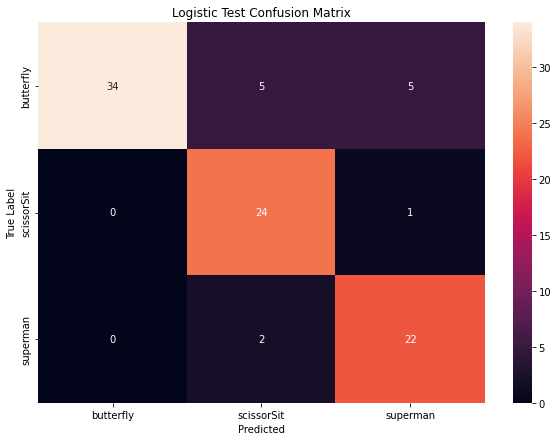

In [ ]:
#get predictions
y_pred = logisticRegr.predict(X_test)
title = "Logistic Test Confusion Matrix"


#confusion matrix
classLabels = le.classes_
the_matrix = confusion_matrix(y_pred, y_test, labels=np.unique(numLabels))
print(the_matrix)

df_cfm = pd.DataFrame(the_matrix, index = classLabels, columns = classLabels)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True, fmt='g')
cfm_plot.set_title(title)
cfm_plot.set_xlabel('Predicted')
cfm_plot.set_ylabel('True Label')

from sklearn.metrics import accuracy_score
print("accuracy:", accuracy_score(y_test, y_pred))

##Completely OOS

In [ ]:
oosTestdf = pd.read_csv('/content/gdrive/MyDrive/pointYourPoseResearchColabs/poleTestCsvOut.csv',header=None)

In [ ]:
#get labels
testlabels = oosTestdf.iloc[:,1]

#code labels
leT = preprocessing.LabelEncoder()
leT.fit(labels)

testNumLabels = leT.transform(testlabels)
print(np.unique(testNumLabels))
print(leT.classes_)
testFeatures = oosTestdf.iloc[:,2:]

[0 1 2]
['butterfly' 'scissorSit' 'superman']


[[31  2  4]
 [ 0 19  0]
 [ 0  8  8]]
Artificial Neural Network OOS Accuracy: 0.8055555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


Text(69.0, 0.5, 'True Label')

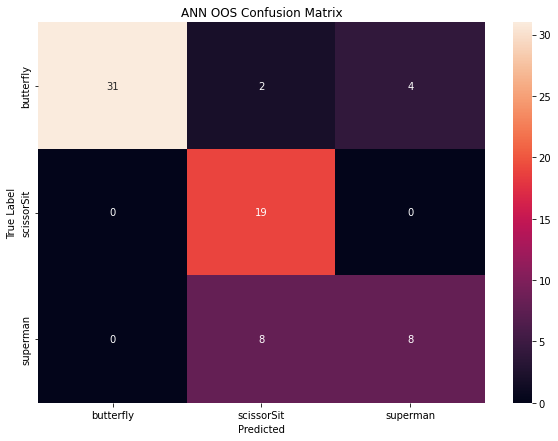

In [ ]:
#ANN OOS
y_pred = ann.predict(testFeatures)
title = "ANN OOS Confusion Matrix"

#confusion matrix
classLabels = leT.classes_
the_matrix = confusion_matrix(y_pred, testNumLabels, labels=np.unique(testNumLabels))
print(the_matrix)

print("Artificial Neural Network OOS Accuracy:", str(accuracy_score(testNumLabels, y_pred)))

df_cfm = pd.DataFrame(the_matrix, index = classLabels, columns = classLabels)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True, fmt='g')
cfm_plot.set_title(title)
cfm_plot.set_xlabel('Predicted')
cfm_plot.set_ylabel('True Label')

[[31  0  0]
 [ 0  4  0]
 [ 0 25 12]]
Support Vector Machine OOS Accuracy: 0.6527777777777778


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Text(69.0, 0.5, 'True Label')

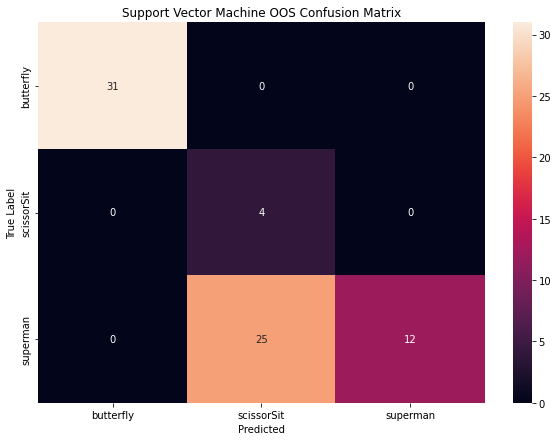

In [ ]:
#SVM OOS
y_pred = supVM.predict(testFeatures)
title = "Support Vector Machine OOS Confusion Matrix"


#confusion matrix
classLabels = leT.classes_
the_matrix = confusion_matrix(y_pred, testNumLabels, labels=np.unique(testNumLabels))
print(the_matrix)

print("Support Vector Machine OOS Accuracy:", str(accuracy_score(testNumLabels, y_pred)))

df_cfm = pd.DataFrame(the_matrix, index = classLabels, columns = classLabels)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True, fmt='g')
cfm_plot.set_title(title)
cfm_plot.set_xlabel('Predicted')
cfm_plot.set_ylabel('True Label')

[[30  7  6]
 [ 1 17  1]
 [ 0  5  5]]
Logistic OOS Accuracy: 0.7222222222222222


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


Text(69.0, 0.5, 'True Label')

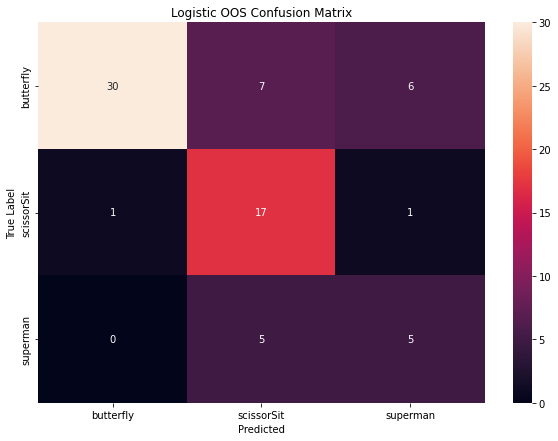

In [ ]:
#logistic OOS
y_pred = logisticRegr.predict(testFeatures)
title = "Logistic OOS Confusion Matrix"


#confusion matrix
classLabels = leT.classes_
the_matrix = confusion_matrix(y_pred, testNumLabels, labels=np.unique(testNumLabels))
print(the_matrix)

print("Logistic OOS Accuracy:", str(accuracy_score(testNumLabels, y_pred)))

df_cfm = pd.DataFrame(the_matrix, index = classLabels, columns = classLabels)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True, fmt='g')
cfm_plot.set_title(title)
cfm_plot.set_xlabel('Predicted')
cfm_plot.set_ylabel('True Label')